___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


%matplotlib inline

pd.set_option('display.max_columns', 150)
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [24]:
df_male = pd.read_csv('ANSUR II FEMALE Public.csv')

In [25]:
df_female = pd.read_csv('ANSUR II MALE Public.csv', encoding='latin-1')

## Explore Data

In [26]:
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)

df = pd.concat([df_male, df_female], axis=0, ignore_index=True)

df_shape = df.shape
df_head = df.head()

df_shape, df_head

((6068, 109),
    SubjectId  abdominalextensiondepthsitting  acromialheight  \
 0  10037.000                             231            1282   
 1  10038.000                             194            1379   
 2  10042.000                             183            1369   
 3  10043.000                             261            1356   
 4  10051.000                             309            1303   
 
    acromionradialelength  anklecircumference  axillaheight  \
 0                    301                 204          1180   
 1                    320                 207          1292   
 2                    329                 233          1271   
 3                    306                 214          1250   
 4                    308                 214          1210   
 
    balloffootcircumference  balloffootlength  biacromialbreadth  \
 0                      222               177                373   
 1                      225               178                372   
 2        

In [27]:
# Value counts for DODRace column
dod_race_value_counts = df["DODRace"].value_counts()

# Drop DODRace class if value count is below 500
drop_races = dod_race_value_counts[dod_race_value_counts < 500].index
df = df[~df["DODRace"].isin(drop_races)]

dod_race_value_counts
df.shape

(5769, 109)

In [28]:
# Identify columns with missing values
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

# Identify columns to drop based on the criteria provided
drop_list = []
for col, missing in columns_with_missing_values.items():
    if missing > 0.3 * len(df):  # If more than 30% data is missing
        drop_list.append(col)

# Drop the identified columns
df.drop(columns=drop_list, inplace=True)

# Check if there are still columns with missing values
remaining_missing_values = df.isnull().sum().sum()

# Shape of the dataframe after dropping columns
df_shape_after_dropping = df.shape

df_shape_after_dropping, remaining_missing_values


((5769, 106), 0)

In [29]:
# This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


In [30]:
# This is a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}


In [31]:
df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()

California              417
New York                411
Texas                   386
North America           264
Indiana                 264
Florida                 210
Illinois                210
Oklahoma                205
Minnesota               194
Michigan                194
Mississippi             193
Georgia                 168
Alabama                 164
South Carolina          161
Europe                  146
North Carolina          145
Ohio                    139
Louisiana               136
Pennsylvania            130
Virginia                113
Massachusetts           109
Wisconsin                99
New Jersey               88
Missouri                 83
Maryland                 78
Colorado                 78
Arizona                  75
Tennessee                74
Kentucky                 67
Kansas                   62
Washington               61
Iowa                     55
Arkansas                 53
South Dakota             53
South America            43
Oregon              

In [32]:
df["SubjectsBirthLocation"].nunique()

57

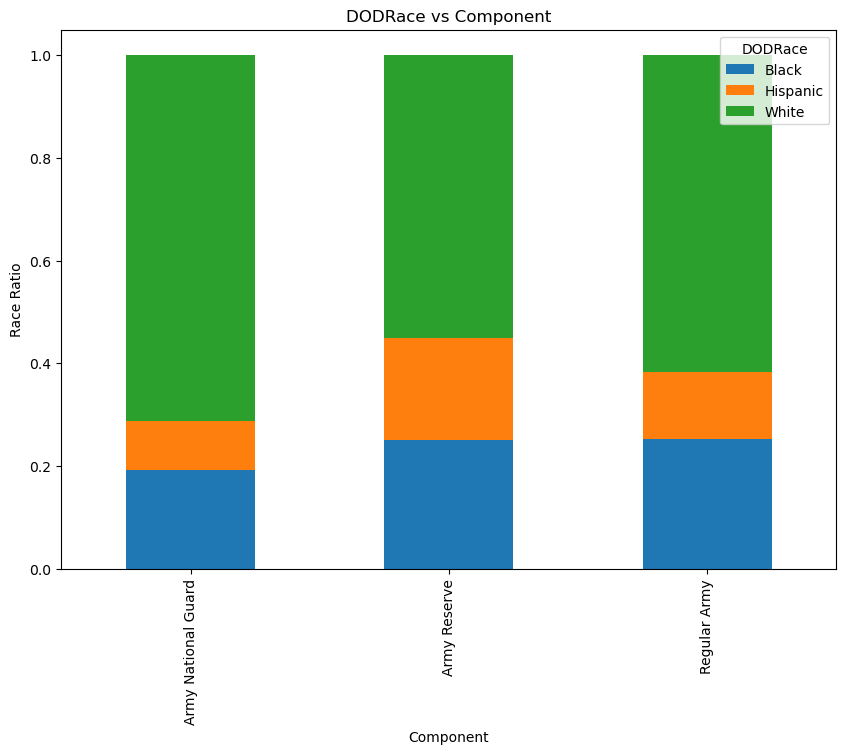

Component            DODRace 
Army National Guard  White      0.712
                     Black      0.191
                     Hispanic   0.097
Army Reserve         White      0.551
                     Black      0.251
                     Hispanic   0.198
Regular Army         White      0.617
                     Black      0.253
                     Hispanic   0.130
Name: DODRace, dtype: float64

In [33]:
# Mapping DODRace to its respective names
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)

# Group by Component and DODRace to get the distribution
component_race_distribution = df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

# Plot the distribution
component_race_distribution_plot = component_race_distribution.unstack().plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('DODRace vs Component')
plt.ylabel('Race Ratio')
plt.show()

component_race_distribution


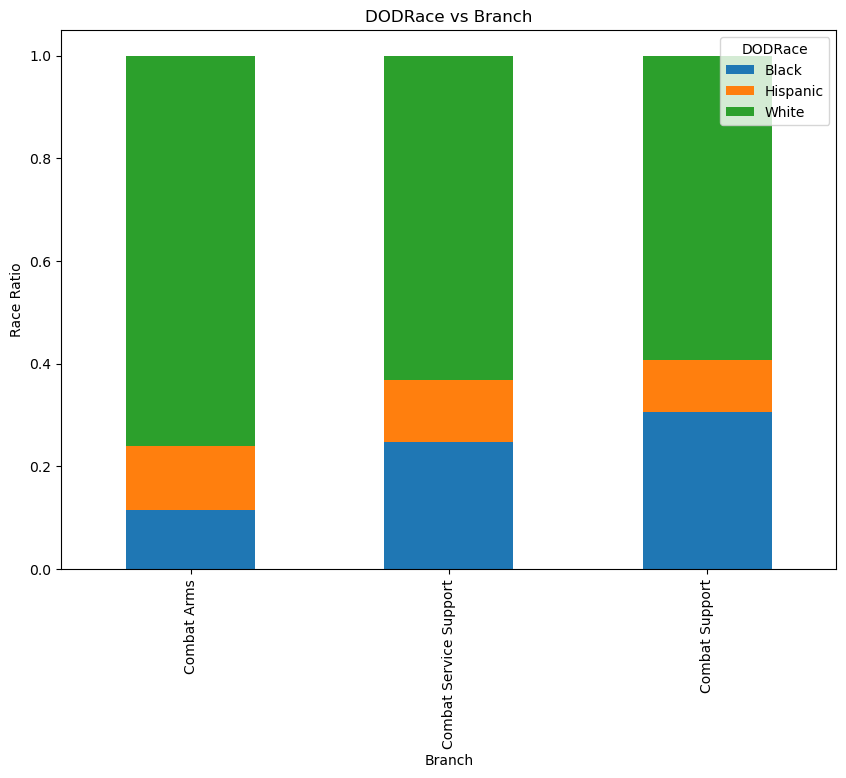

Branch                  DODRace 
Combat Arms             White      0.760
                        Hispanic   0.125
                        Black      0.115
Combat Service Support  White      0.633
                        Black      0.247
                        Hispanic   0.121
Combat Support          White      0.593
                        Black      0.306
                        Hispanic   0.101
Name: DODRace, dtype: float64

In [34]:
# Group by Branch and DODRace to get the distribution
branch_race_distribution = df.groupby(["Branch"])["DODRace"].value_counts(normalize=True)

# Plot the distribution
branch_race_distribution_plot = branch_race_distribution.unstack().plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('DODRace vs Branch')
plt.ylabel('Race Ratio')
plt.show()

branch_race_distribution


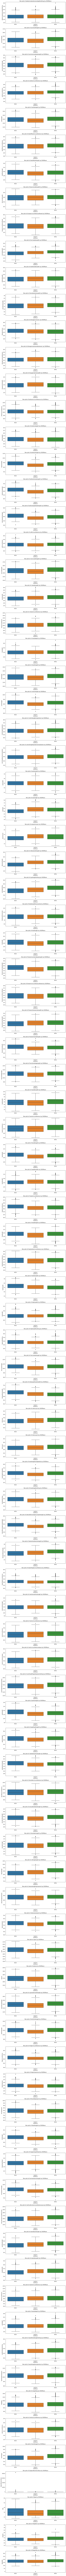

In [35]:
# Plotting box plots for numeric features to inspect potential outliers
numeric_features = df.select_dtypes(exclude="O").columns

# Plotting box plots for each numeric feature
fig, axes = plt.subplots(nrows=len(numeric_features), figsize=(10, 4 * len(numeric_features)))

for feature, ax in zip(numeric_features, axes):
    sns.boxplot(x=df["DODRace"], y=df[feature], ax=ax)
    ax.set_title(f'Box plot of {feature} by DODRace')
    ax.set_ylabel(feature)
    ax.set_xlabel('DODRace')

plt.tight_layout()
plt.show()


In [36]:
# Checking the number of unique values in each categorical feature
categorical_features = df.select_dtypes(include="O").columns
unique_counts = df[categorical_features].nunique().sort_values(ascending=False)

unique_counts


PrimaryMOS               281
Date                     253
SubjectsBirthLocation     57
Installation              12
Component                  3
Branch                     3
DODRace                    3
WritingPreference          3
Gender                     2
dtype: int64

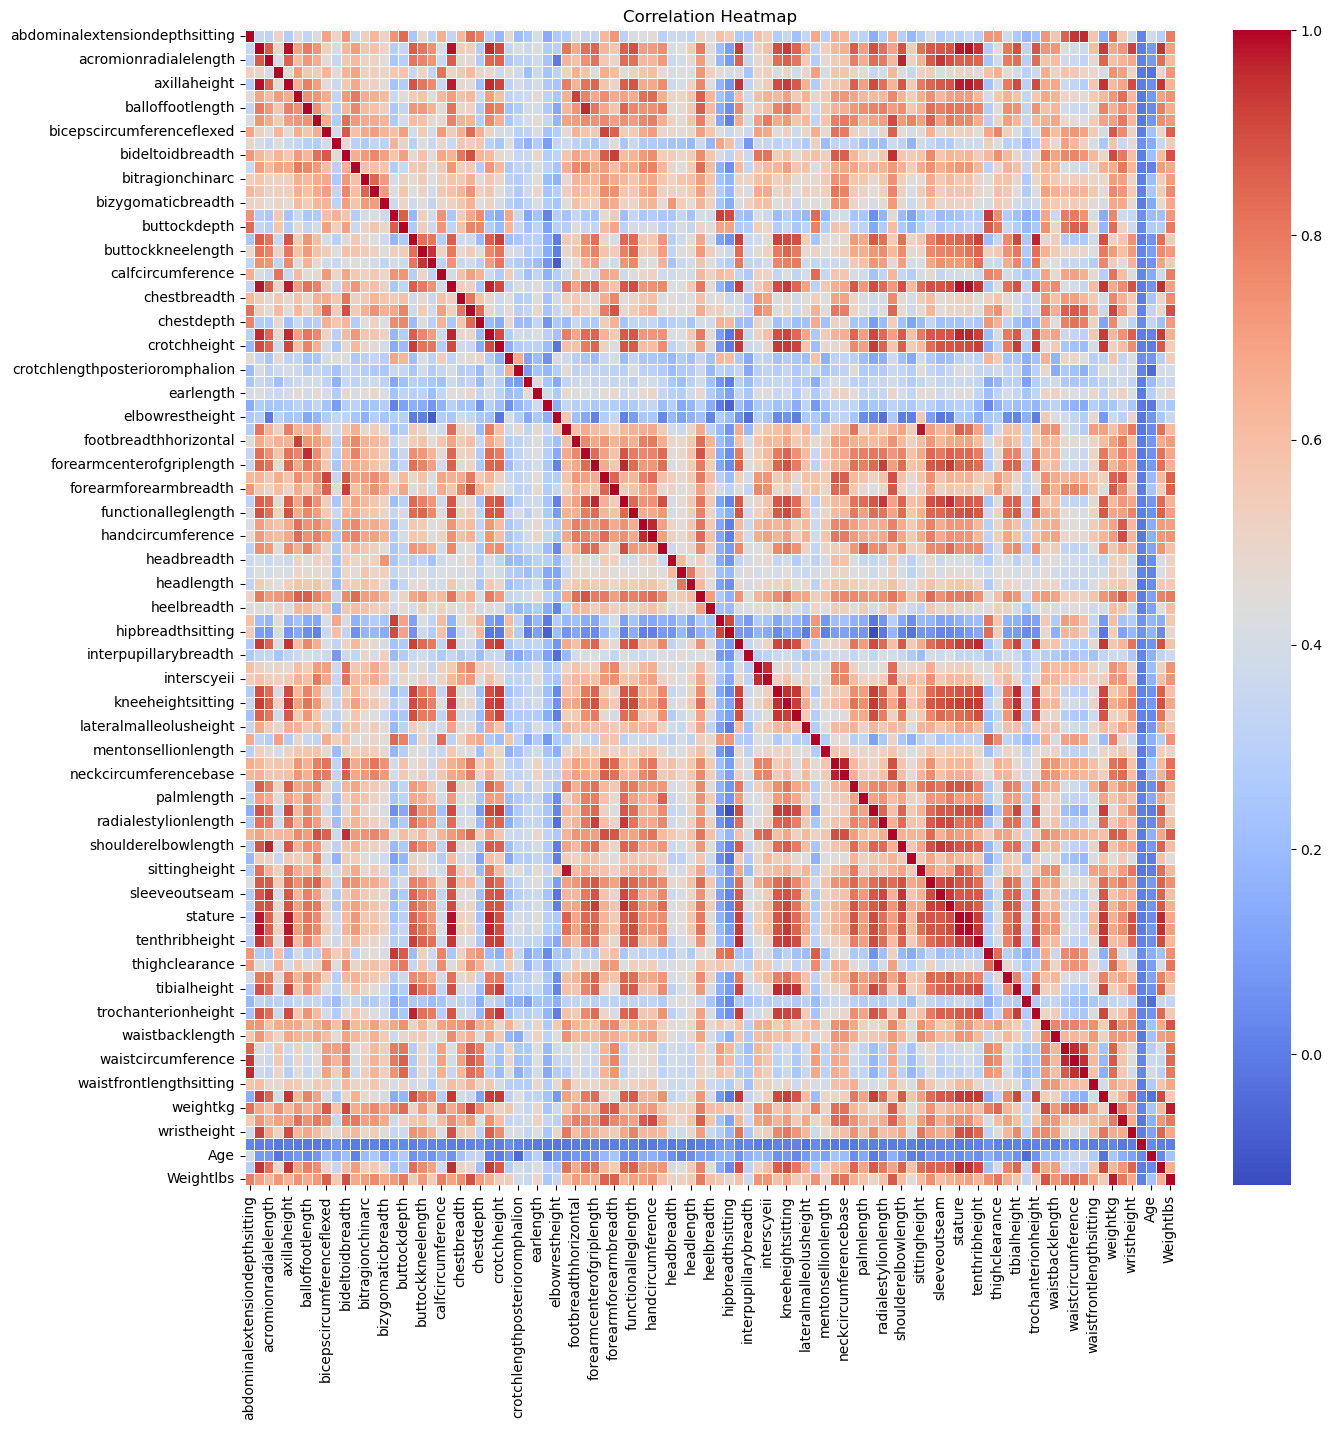

In [37]:
# Plotting a heatmap of the correlation matrix for numeric features
plt.figure(figsize=(15, 15))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".1f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [38]:
df.shape

(5769, 106)

In [20]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Data Preprocessing

# Drop high cardinality features
df.drop(columns=['PrimaryMOS', 'Date'], inplace=True)

# Encoding and Scaling
# - Numeric features will be scaled.
# - Categorical features will be one-hot encoded.
numeric_features = df.select_dtypes(exclude="O").columns.tolist()
categorical_features = df.select_dtypes(include="O").drop(columns="DODRace").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

# 2. Modeling

# Split data into training and test sets
X = df.drop(columns="DODRace")
y = df["DODRace"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=5000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Print out classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       Black       0.91      0.91      0.91       231
    Hispanic       0.77      0.62      0.68       125
       White       0.93      0.96      0.94       798

    accuracy                           0.91      1154
   macro avg       0.87      0.83      0.85      1154
weighted avg       0.91      0.91      0.91      1154

Accuracy: 0.912478336221837


In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
pipeline2 = imbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=5000))
])

pipeline2.fit(X_train, y_train)
y_pred = pipeline2.predict(X_test)

# Print out classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       Black       0.88      0.90      0.89       231
    Hispanic       0.52      0.79      0.63       125
       White       0.96      0.88      0.92       798

    accuracy                           0.87      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.90      0.87      0.88      1154

Accuracy: 0.8717504332755632


In [ ]:
#RANDOM FOREST

In [43]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Data Preprocessing

# Encoding and Scaling
numeric_features = df.select_dtypes(exclude="O").columns.tolist()
categorical_features = df.select_dtypes(include="O").drop(columns="DODRace").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

# 2. Modeling

# Split data into training and test sets
X = df.drop(columns="DODRace")
y = df["DODRace"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create and fit a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = clf.predict(X_test_preprocessed)

# Print out classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       Black       0.88      0.96      0.92       231
    Hispanic       0.81      0.66      0.73       125
       White       0.97      0.97      0.97       798

    accuracy                           0.93      1154
   macro avg       0.89      0.86      0.87      1154
weighted avg       0.93      0.93      0.93      1154

Accuracy: 0.9341421143847487


In [42]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

# 1. Data Preprocessing



# Encoding and Scaling
numeric_features = df.select_dtypes(exclude="O").columns.tolist()
categorical_features = df.select_dtypes(include="O").drop(columns="DODRace").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

# 2. Modeling

# Split data into training and test sets
X = df.drop(columns="DODRace")
y = df["DODRace"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline with SMOTE
pipeline = imbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier())
])

# Hyperparameters for grid search
param_grid = {
    'smote__k_neighbors': [1, 2, 5, 10],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Print out classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'smote__k_neighbors': 1}
              precision    recall  f1-score   support

       Black       0.87      0.97      0.92       231
    Hispanic       0.77      0.77      0.77       125
       White       0.99      0.95      0.97       798

    accuracy                           0.94      1154
   macro avg       0.88      0.90      0.89      1154
weighted avg       0.94      0.94      0.94      1154

Accuracy: 0.9376083188908145


In [21]:
# Detect categorical columns by checking their data types
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

# Find unique values for each categorical column
unique_values = {col: df[col].unique() for col in categorical_columns}

# Print the unique values for each categorical column
for col, values in unique_values.items():
    print(f"Unique values for column '{col}': {len(values)}")

Unique values for column 'Gender': 2
Unique values for column 'Date': 253
Unique values for column 'Installation': 12
Unique values for column 'Component': 3
Unique values for column 'Branch': 3
Unique values for column 'PrimaryMOS': 281
Unique values for column 'SubjectsBirthLocation': 136
Unique values for column 'WritingPreference': 3


In [22]:
#SVM

In [44]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


numeric_features = df.select_dtypes(exclude="O").columns.tolist()
categorical_features = df.select_dtypes(include="O").drop(columns="DODRace").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

# 2. Modeling

# Split data into training and test sets
X = df.drop(columns="DODRace")
y = df["DODRace"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create and fit an SVM classifier
clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = clf.predict(X_test_preprocessed)

# Print out classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       231
    Hispanic       0.78      0.62      0.69       125
       White       0.94      0.96      0.95       798

    accuracy                           0.91      1154
   macro avg       0.87      0.83      0.85      1154
weighted avg       0.91      0.91      0.91      1154

Accuracy: 0.9133448873483535


In [ ]:
#XGBOOST

In [48]:
# Libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score


# Encoding and Scaling
numeric_features = df.select_dtypes(exclude="O").columns.tolist()
categorical_features = df.select_dtypes(include="O").drop(columns="DODRace").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

# Encode the target labels
le = LabelEncoder()
df["DODRace"] = le.fit_transform(df["DODRace"])

# 2. Modeling

# Split data into training and test sets
X = df.drop(columns="DODRace")
y = df["DODRace"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create and fit an XGBoost classifier
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, n_estimators=100, random_state=42)
clf.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = clf.predict(X_test_preprocessed)

# Convert the numerical predictions back to the original string labels for clarity in the report
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Print out classification report and accuracy
print(classification_report(y_test_labels, y_pred_labels))
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))


              precision    recall  f1-score   support

       Black       0.95      1.00      0.97       231
    Hispanic       0.87      0.94      0.90       125
       White       0.99      0.97      0.98       798

    accuracy                           0.97      1154
   macro avg       0.94      0.97      0.95      1154
weighted avg       0.97      0.97      0.97      1154

Accuracy: 0.9714038128249567
